14MPAA.py를 ipynb로 옮겨서 시험

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc('font', family='NanumMyeongjo',size=8, weight = 'bold')
# plt.rcParams['axes.formatter.useoffset'] = False

plt.rcParams['axes.unicode_minus'] = False

import bt
get_ipython().magic("matplotlib inline")

In [2]:
# 매월 1일로 resample한 데이터
자료1 = pd.read_csv("data/mpaa.csv", index_col=0, parse_dates=True)
tickers = {'국가':['S&P 500', '러셀 3000', '니케이 225', '항셍', '홍콩 H', '대만 가권', '상해종합',
                    '영국 FTSE 100', '프랑스 CAC 40', '독일 DAX', 'KOSPI', '인도 SENSEX'],
           '섹터':['에너지', '화학', '금속및광물', '기타 소재', '건설', '기타자본재', '상업서비스',
                    '운송', '자동차및부품', '내구소비재및의류', '소비자서비스', '미디어', '유통',
                    '음식료및담배', '생활용품', '의료', '은행', '보험', '증권', '기타금융',
                    '소프트웨어', '하드웨어', '반도체', '디스플레이', '통신서비스', '유틸리티'],
           '팩터':['블루칩30', '모멘텀', '경기방어주', '고배당주', '베타플러스', 'Low Vol', '배당성장',
                    'Big Vol 지수', 'FnGuide 컨트래리안', 'FnGuide 퀄리티밸류 지수', '대형가치',
                    '대형성장', '대형순수가치', '대형순수성장', '중형가치', '중형성장', '중형순수가치',
                    '중형순수성장', '소형가치', '소형성장', '소형순수가치', '소형순수성장', '중대형가치',
                    '중대형성장', '중대형순수가치', '중대형순수성장', '중소형가치', '중소형순수가치',
                    '중소형성장', '중소형순수성장'],
           '채권':['채권', '20년채권', '채권인버스'],
           '현금':['현금']}

In [3]:
자료1

,S&P 500,러셀 3000,니케이 225,항셍,홍콩 H,대만 가권,상해종합,영국 FTSE 100,프랑스 CAC 40,독일 DAX,...,중대형순수가치,중대형순수성장,중소형가치,중소형순수가치,중소형성장,중소형순수성장,채권,20년채권,채권인버스,현금
날짜,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1366.01,749.98,13843.60,16102.40,1588.2500,5936.20,2065.61,6297.50,5998.49,6795.14,...,1259.45,1337.14,1232.67,1182.45,1442.17,1417.81,100.000000,100.000000,100.000000,100.000000
2001-02-01,1239.94,680.52,12883.50,14787.90,1809.6300,5674.69,1959.18,5917.90,5367.48,6208.24,...,1285.73,1213.86,1251.95,1228.12,1408.62,1399.86,100.617959,101.235918,99.385836,100.250000
2001-03-01,1160.33,635.67,12999.70,12760.60,1815.1801,5797.92,2112.78,5633.70,5180.45,5829.95,...,1116.77,1148.24,1103.51,1100.67,1234.15,1243.21,93.750270,87.416182,106.666360,100.500625
2001-04-01,1249.46,686.12,13934.30,13386.00,2062.6499,5381.67,2119.18,5966.90,5640.03,6264.51,...,1223.92,1296.20,1160.20,1164.17,1359.52,1343.03,92.020801,84.190941,108.671082,100.751877
2001-05-01,1255.82,690.63,13262.10,13174.40,2335.3501,5048.86,2214.26,5796.10,5454.19,6123.26,...,1440.35,1311.41,1365.33,1470.43,1478.98,1465.28,96.380821,92.169012,103.755082,101.003756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-01,2362.72,1401.50,18909.26,24111.59,10273.6700,9811.52,3222.51,7322.92,5122.51,12312.87,...,14440.26,2669.70,7866.89,18569.57,1354.78,1217.40,277.908702,704.059710,35.983040,190.261270
2017-04-01,2384.20,1414.84,19202.50,24615.13,10219.8900,9872.00,3154.66,7203.94,5267.33,12438.01,...,14604.47,2714.20,7940.69,18831.26,1388.56,1274.64,277.717480,703.090821,36.007816,190.381512
2017-05-01,2411.80,1426.10,19650.57,25660.65,10602.9700,10040.72,3117.18,7519.95,5283.63,12615.06,...,15606.22,2929.06,8430.10,20020.89,1466.88,1342.89,278.184911,705.457587,35.947313,190.790336


In [4]:
def 월간수익률(데이터):
    return 데이터 / 데이터.shift(1)

# %%
def 변동성대비모멘텀(데이터):
    a = 데이터/데이터.shift(12)
    b = 월간수익률(데이터).rolling(12).std()
    return a/b

# %%
def 연평균수익률(데이터): # not used
    return 데이터/데이터.shift(12)

# %%   앞 12개 NaN (2001-1 ~2001-12)
def 평균모멘텀(데이터, 개월=12):
    초기값 = 0
    for i in range(1, 개월+1):
        초기값 = 데이터 / 데이터.shift(i) + 초기값
    return 초기값 / 개월

# %%
def 모멘텀순위(데이터, 순위):
    x = 평균모멘텀(데이터)
    y = x.iloc[ : , 0: len(x.columns)].rank(1, ascending=0)
    y[y <= 순위] = 1
    y[y > 순위] = 0
    return y

# %%
def 평균모멘텀스코어(데이터):
    a = 평균모멘텀(데이터).copy()
    초기값 = 0
    for i in range(1, 13):
        초기값 = np.where(데이터 / 데이터.shift(i) > 1, 1, 0) + 초기값
    a[a > -1] = 초기값/12
    return a

# %%
def 평균모멘텀스코어6(데이터):
    a = 평균모멘텀(데이터, 6).copy() # bug 수익곡선은 6개월만 있으면 되는 12개월을 잡아먹음
    초기값 = 0
    for i in range(1, 7):
        초기값 = np.where(데이터 / 데이터.shift(i) > 1, 1, 0) + 초기값
    a[a > -1] = 초기값/6
    return a

# %%
def 현금혼합모멘텀수익곡선(데이터, 현금비율=0):
    # 데이터수익률+현금수익률
    # --------------------  . cumprod() 로 지수화
    #  전체 비중    
    # x = 월간수익률(자료1[tickers['현금']])*현금비율
    # a = pd.DataFrame( (월간수익률(데이터).values*평균모멘텀스코어(데이터).shift(1).values+x.values) \
    #                  / \
    #                  (현금비율+평균모멘텀스코어(데이터).shift(1).values) )\
    #                  .cumprod()
    x = 월간수익률(자료1[tickers['현금']])*현금비율*평균모멘텀스코어(자료1[tickers['현금']]).shift(1).values                     
    a = pd.DataFrame( (월간수익률(데이터).values*평균모멘텀스코어(데이터).shift(1).values+x.values) \
                     / \
                     (현금비율*평균모멘텀스코어(자료1[tickers['현금']]).shift(1).values+평균모멘텀스코어(데이터).shift(1).values) )\
                     .cumprod()
    a.index = 데이터.index
    a.columns = 데이터.columns
    return a

# %%
def 자산군통합포트(데이터, 순위, 자산군비중, 이름, 현금비율):
    x = 월간수익률(현금혼합모멘텀수익곡선(데이터, 현금비율))
    y = np.where(모멘텀순위(데이터, 순위).shift(1)==0,np.nan,자산군비중/순위)

    z = ((x*y).sum(1)).dropna()
    z = z.replace(0, np.nan)

    df = pd.DataFrame(현금혼합모멘텀수익곡선(데이터, 현금비율)*y, index=데이터.index)
    df.columns = 데이터.columns
    df.to_csv(이름+".csv")
    return z

# %%
def 통합모멘텀(국가비중,섹터비중,팩터비중,채권비중, 현금비율):
    a = 자산군통합포트(자료1[tickers['국가']],4,국가비중, '국가', 현금비율) # 2021-1~2022.2 NaN
    b = 자산군통합포트(자료1[tickers['섹터']],8,섹터비중, '섹터', 현금비율)
    c = 자산군통합포트(자료1[tickers['팩터']],10,팩터비중, '팩터', 현금비율)
    d = 자산군통합포트(자료1[tickers['채권']],1,채권비중, '채권', 현금비율)

    e = (pd.concat([a, b, c, d], axis=1).sum(1)/(국가비중+섹터비중+팩터비중+채권비중))
    # print(e.head(20))

    e = e.replace(0,np.nan).cumprod()
    e.columns = ['통합수익']
    return e

# %%
def 수익곡선모멘텀(국가비중,섹터비중,팩터비중,채권비중, 현금비율):
    x = 월간수익률(자료1[tickers['현금']])
    y = pd.DataFrame(통합모멘텀(국가비중,섹터비중,팩터비중,채권비중, 현금비율), index = x.index)  # x.index는 날짜  2001.1~2002.2 NaN
    # print(y.head(20))
    # print(월간수익률(y).head(25)) # 2002.3 NaN

    y.dropna().to_csv("통합모멘텀.csv")
    # print(평균모멘텀스코어6(y).to_csv("수익곡선.csv"))
    # 수익곡선모멘텀
    a = pd.DataFrame((월간수익률(y).values*평균모멘텀스코어6(y).shift(1).values+(1-평균모멘텀스코어6(y).shift(1).values)*x.values), index = x.index).cumprod().dropna()
    return a

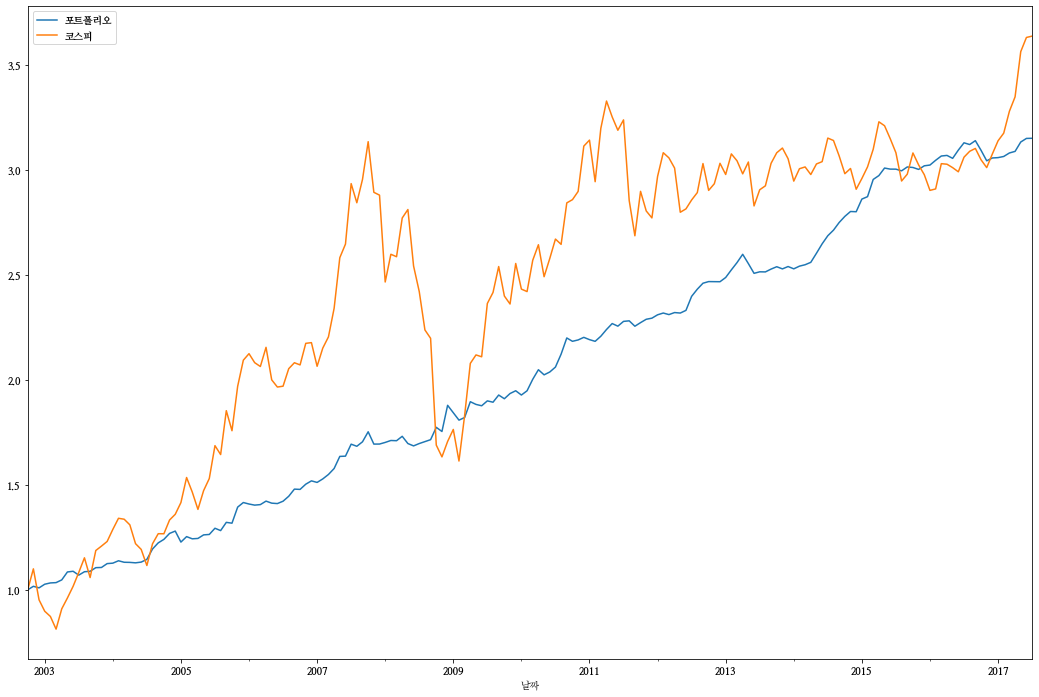

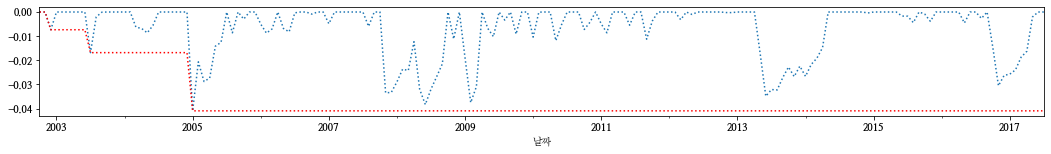

CAGR : 8.09%
MDD : -4.09%


In [5]:
a = 수익곡선모멘텀(1,1,1,3, 현금비율=1)
b = 자료1[tickers['국가']].KOSPI/자료1[tickers['국가']].KOSPI.iloc[0]

a.to_csv("수익곡선.csv")

c = pd.concat([a, b], axis=1).dropna()
c.columns = ['포트폴리오', '코스피']

c.divide(c.iloc[0]).plot(figsize = (18,12))
plt.show()

#5. MDD
최대하락 = c.포트폴리오.rolling(min_periods=1, window = 500).max()
당월하락 = c.포트폴리오/최대하락 - 1.0
최대하락폭 = 당월하락.rolling(min_periods=1, window=500).min()

당월하락.plot(subplots=True, figsize = (18,2), linestyle='dotted');
최대하락폭.plot(subplots=True, figsize = (18,2), color = 'red', linestyle='dotted');
plt.show()

#6. MDD / CAGR
투자기간 = len(c.index)/12
print("CAGR : "+str(c.포트폴리오[-1]**(1/투자기간)*100-100)[0:4]+"%")
print("MDD : "+str(최대하락폭.min()*100)[0:5]+"%")

In [6]:
c.to_csv('mpaa_result.csv')

In [7]:
c.calc_stats().display()

Stat                 포트폴리오    코스피
-------------------  ------------  ----------
Start                2002-10-01    2002-10-01
End                  2017-07-01    2017-07-01
Risk-free rate       0.00%         0.00%

Total Return         214.99%       263.63%
Daily Sharpe         -             -
Daily Sortino        -             -
CAGR                 8.09%         9.15%
Max Drawdown         -4.09%        -48.52%
Calmar Ratio         1.98          0.19

MTD                  0.02%         0.18%
3m                   2.02%         8.64%
6m                   3.01%         15.88%
YTD                  3.07%         18.24%
1Y                   0.69%         18.84%
3Y (ann.)            5.45%         4.89%
5Y (ann.)            5.61%         4.95%
10Y (ann.)           6.40%         2.17%
Since Incep. (ann.)  8.09%         9.15%

Daily Sharpe         -             -
Daily Sortino        -             -
Daily Mean (ann.)    -             -
Daily Vol (ann.)     -             -
Daily Skew           - 

# 자료 분석을 위해 테스트한 코드들

In [7]:
aa = 자산군통합포트(자료1[tickers['국가']],4,1,'국가', 1)

In [8]:
aa

날짜
2001-01-01         NaN
2001-02-01         NaN
2001-03-01         NaN
2001-04-01         NaN
2001-05-01         NaN
                ...   
2017-03-01    1.005097
2017-04-01    1.006645
2017-05-01    1.013330
2017-06-01    0.995588
2017-07-01    1.001698
Length: 199, dtype: float64

In [9]:
aa = aa.cumprod().dropna()
aa

날짜
2002-03-01    1.020925
2002-04-01    1.009835
2002-05-01    1.003262
2002-06-01    0.979760
2002-07-01    0.964116
                ...   
2017-03-01    3.359777
2017-04-01    3.382101
2017-05-01    3.427183
2017-06-01    3.412062
2017-07-01    3.417856
Length: 185, dtype: float64

In [10]:
aa = aa/aa.iloc[0] * 100

In [11]:
aa

날짜
2002-03-01    100.000000
2002-04-01     98.913700
2002-05-01     98.269909
2002-06-01     95.967853
2002-07-01     94.435478
                 ...    
2017-03-01    329.091386
2017-04-01    331.278081
2017-05-01    335.693893
2017-06-01    334.212769
2017-07-01    334.780258
Length: 185, dtype: float64

In [12]:
# 자산군통합포트
x = 월간수익률(현금혼합모멘텀수익곡선(자료1[tickers['국가']], 1))

# y = np.where(모멘텀순위(데이터, 순위).shift(1)==0,np.nan,자산군비중/순위)

# z = ((x*y).sum(1)).dropna()
# z = z.replace(0, np.nan)

In [13]:
평균모멘텀스코어(자료1[tickers['국가']]).shift(1).dropna()

,S&P 500,러셀 3000,니케이 225,항셍,홍콩 H,대만 가권,상해종합,영국 FTSE 100,프랑스 CAC 40,독일 DAX,KOSPI,인도 SENSEX
날짜,,,,,,,,,,,,
2002-02-01,0.166667,0.250000,0.083333,0.166667,0.666667,0.916667,0.000000,0.166667,0.166667,0.250000,1.000000,0.416667
2002-03-01,0.166667,0.166667,0.333333,0.166667,0.750000,0.833333,0.083333,0.166667,0.250000,0.250000,1.000000,0.750000
2002-04-01,0.500000,0.666667,0.583333,0.333333,0.750000,1.000000,0.166667,0.500000,0.500000,0.583333,1.000000,0.666667
2002-05-01,0.166667,0.166667,0.666667,0.666667,0.750000,0.916667,0.333333,0.333333,0.250000,0.333333,0.916667,0.583333
2002-06-01,0.166667,0.166667,0.750000,0.583333,0.833333,0.666667,0.083333,0.166667,0.083333,0.166667,0.750000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.916667,1.000000,0.916667,1.000000,1.000000,1.000000
2017-04-01,0.916667,0.916667,0.750000,1.000000,0.916667,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000
2017-05-01,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,0.666667,0.833333,1.000000,1.000000,1.000000,1.000000


In [14]:
현금_평균모멘텀 = 평균모멘텀스코어(자료1[tickers['현금']]).shift(1).dropna()

In [15]:
현금_평균모멘텀.loc['2013-8-1']

현금    0.75
Name: 2013-08-01 00:00:00, dtype: float64

In [16]:
y = np.where(모멘텀순위(자료1[tickers['국가']], 4).shift(1)==0,np.nan,1/4)

In [17]:
y

array([[0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25],
       ...,
       [ nan,  nan, 0.25, ..., 0.25,  nan,  nan],
       [ nan,  nan,  nan, ..., 0.25, 0.25,  nan],
       [ nan,  nan, 0.25, ...,  nan, 0.25,  nan]])

In [18]:
df = pd.DataFrame(y, index=자료1[tickers['국가']].index)
df.columns = 자료1[tickers['국가']].columns


In [19]:
df['2002-3':]

,S&P 500,러셀 3000,니케이 225,항셍,홍콩 H,대만 가권,상해종합,영국 FTSE 100,프랑스 CAC 40,독일 DAX,KOSPI,인도 SENSEX
날짜,,,,,,,,,,,,
2002-03-01,NaN,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN,NaN,0.25,0.25
2002-04-01,NaN,NaN,NaN,NaN,0.25,0.25,NaN,NaN,NaN,NaN,0.25,0.25
2002-05-01,NaN,NaN,0.25,NaN,0.25,0.25,NaN,NaN,NaN,NaN,0.25,NaN
2002-06-01,NaN,NaN,0.25,NaN,0.25,0.25,NaN,NaN,NaN,NaN,0.25,NaN
2002-07-01,NaN,NaN,NaN,NaN,0.25,0.25,0.25,NaN,NaN,NaN,0.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-01,NaN,0.25,0.25,NaN,0.25,NaN,NaN,NaN,NaN,0.25,NaN,NaN
2017-04-01,NaN,0.25,NaN,NaN,0.25,NaN,NaN,NaN,0.25,0.25,NaN,NaN
2017-05-01,NaN,NaN,0.25,0.25,NaN,NaN,NaN,NaN,0.25,0.25,NaN,NaN


In [20]:
통합 = 통합모멘텀(1,0,0,0, 1).dropna().to_frame()
통합.columns = ['통합모멘텀']
통합

,통합모멘텀
날짜,
2002-03-01,1.020925
2002-04-01,1.009835
2002-05-01,1.003262
2002-06-01,0.979760
2002-07-01,0.964116
...,...
2017-03-01,3.359777
2017-04-01,3.382101
2017-05-01,3.427183


In [21]:
import bt
get_ipython().magic("matplotlib inline")
통합.calc_stats().display()

Stat                 통합모멘텀
-------------------  ------------
Start                2002-03-01
End                  2017-07-01
Risk-free rate       0.00%

Total Return         234.78%
Daily Sharpe         -
Daily Sortino        -
CAGR                 8.20%
Max Drawdown         -17.12%
Calmar Ratio         0.48

MTD                  0.17%
3m                   1.06%
6m                   3.68%
YTD                  3.19%
1Y                   1.68%
3Y (ann.)            2.50%
5Y (ann.)            5.48%
10Y (ann.)           5.00%
Since Incep. (ann.)  8.20%

Daily Sharpe         -
Daily Sortino        -
Daily Mean (ann.)    -
Daily Vol (ann.)     -
Daily Skew           -
Daily Kurt           -
Best Day             -
Worst Day            -

Monthly Sharpe       1.02
Monthly Sortino      2.07
Monthly Mean (ann.)  8.23%
Monthly Vol (ann.)   8.06%
Monthly Skew         0.12
Monthly Kurt         0.93
Best Month           8.08%
Worst Month          -6.41%

Yearly Sharpe        0.83
Yearly Sortino      

In [22]:
# 현금비율*평균모멘텀스코어(자료1[tickers['현금']]).shift(1).values
1.0*평균모멘텀스코어(자료1[tickers['현금']]).shift(1).values

array([[       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

In [23]:
월간수익률(자료1[tickers['현금']])*1.0*평균모멘텀스코어(자료1[tickers['현금']]).shift(1).values

,현금
날짜,
2001-01-01,NaN
2001-02-01,NaN
2001-03-01,NaN
2001-04-01,NaN
2001-05-01,NaN
...,...
2017-03-01,0.584865
2017-04-01,0.667088
2017-05-01,0.668098


In [24]:
월간수익률(자료1[tickers['현금']]).values*1.0*평균모멘텀스코어(자료1[tickers['현금']]).shift(1).values

array([[       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.0025    ],
       [1.00915058],
       [1.01888188],
       [1.00482541],
       [1.00557399],
       [1.00611966],
       [1.003

In [25]:
x = 현금혼합모멘텀수익곡선(자료1[tickers['국가']], 1.0)
x

,S&P 500,러셀 3000,니케이 225,항셍,홍콩 H,대만 가권,상해종합,영국 FTSE 100,프랑스 CAC 40,독일 DAX,KOSPI,인도 SENSEX
날짜,,,,,,,,,,,,
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-01,2.472891,2.539980,2.645817,2.598428,4.271434,2.026074,3.335912,2.070133,2.237162,2.950321,2.723273,4.605981
2017-04-01,2.486565,2.554653,2.668326,2.631644,4.259625,2.034080,3.297828,2.050475,2.275676,2.969058,2.758158,4.634940
2017-05-01,2.505971,2.569046,2.707976,2.700972,4.352394,2.056685,3.281779,2.102403,2.281856,2.996966,2.867034,4.753010


In [26]:
y = np.where(모멘텀순위(자료1[tickers['국가']], 4).shift(1)==0,np.nan,1/4)
y

array([[0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25],
       ...,
       [ nan,  nan, 0.25, ..., 0.25,  nan,  nan],
       [ nan,  nan,  nan, ..., 0.25, 0.25,  nan],
       [ nan,  nan, 0.25, ...,  nan, 0.25,  nan]])

In [27]:
# x 가상의 현금혼합모멘텀수익곡선 -> 각 국가지수의 비중을 역추산하기는 어렵다.
# y 순위에 따른 선택지수 비중
df = x*y
df['2002-2-1':].head(20)

,S&P 500,러셀 3000,니케이 225,항셍,홍콩 H,대만 가권,상해종합,영국 FTSE 100,프랑스 CAC 40,독일 DAX,KOSPI,인도 SENSEX
날짜,,,,,,,,,,,,
2002-02-01,NaN,NaN,NaN,NaN,0.255286,0.246742,NaN,NaN,NaN,NaN,0.262330,0.256021
2002-03-01,NaN,NaN,NaN,NaN,0.257107,0.256359,NaN,NaN,NaN,NaN,0.274749,0.253524
2002-04-01,NaN,NaN,NaN,NaN,0.258559,0.254565,NaN,NaN,NaN,NaN,0.266926,0.250070
2002-05-01,NaN,NaN,0.262000,NaN,0.263021,0.247068,NaN,NaN,NaN,NaN,0.260312,NaN
2002-06-01,NaN,NaN,0.251475,NaN,0.265444,0.238350,NaN,NaN,NaN,NaN,0.253164,NaN
2002-07-01,NaN,NaN,NaN,NaN,0.258709,0.235459,0.248225,NaN,NaN,NaN,0.250458,NaN
2002-08-01,NaN,NaN,NaN,NaN,0.252422,0.233415,0.249328,NaN,NaN,NaN,0.253016,NaN
2002-09-01,NaN,NaN,NaN,NaN,0.251381,NaN,0.245504,NaN,NaN,NaN,0.243133,0.241622
2002-10-01,NaN,NaN,NaN,NaN,0.249882,NaN,0.243694,NaN,NaN,NaN,0.244559,0.241426


In [28]:
df.sum(1).head(20)

날짜
2001-01-01    0.000000
2001-02-01    0.000000
2001-03-01    0.000000
2001-04-01    0.000000
2001-05-01    0.000000
2001-06-01    0.000000
2001-07-01    0.000000
2001-08-01    0.000000
2001-09-01    0.000000
2001-10-01    0.000000
2001-11-01    0.000000
2001-12-01    0.000000
2002-01-01    0.000000
2002-02-01    1.020379
2002-03-01    1.041740
2002-04-01    1.030120
2002-05-01    1.032401
2002-06-01    1.008433
2002-07-01    0.992852
2002-08-01    0.988181
dtype: float64